In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install pymupdf

In [ ]:
!pip install PyPDF2 spacy

In [ ]:
!python -m spacy download en_core_web_sm

2023-12-01 18:21:02.102015: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 18:21:02.102085: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 18:21:02.102123: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-01 18:21:02.113654: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-01 18:21:03.938244: W tensorflow/compiler/

In [ ]:
!pip install pycryptodome

In [ ]:
import os
import PyPDF2
import spacy
import fitz

nlp = spacy.load('en_core_web_sm')

# Folder Path
path = "/content/gdrive/MyDrive/sam2"

# Change the directory
os.chdir(path)

def preprocess(text):
    doc = nlp(text)
    result = [token.lemma_ for token in doc if token.is_alpha and len(token) > 3]
    return result

doc_corpus = []

import fitz  # PyMuPDF

def read_pdf(file_path):
    text = ''
    with fitz.open(file_path) as pdf_doc:
        for page_number in range(pdf_doc.page_count):
            page = pdf_doc[page_number]
            text += page.get_text()
    return text


# Iterate over all the files in the directory
for file in os.listdir():
    if file.endswith('.pdf'):
        # Create the filepath of a particular file
        file_path = os.path.join(path, file)
        # print(file_path)
        file_text_data = read_pdf(file_path)
        # print(len(file_text_data))
        file_data = preprocess(file_text_data)
        # print(len(file_data))
        doc_corpus.append(file_data)

print(doc_corpus[:])

[['reportable', 'supreme', 'court', 'INDIA', 'CIVIL', 'APPELLATE', 'ORIGINAL', 'JURISDICTION', 'Civil', 'Appeal', 'State', 'Bank', 'India', 'appellant', 'Versus', 'Rajesh', 'Agarwal', 'respondent', 'with', 'Civil', 'Appeal', 'with', 'Civil', 'Appeal', 'with', 'Civil', 'Appeal', 'with', 'Civil', 'Appeal', 'with', 'Civil', 'Appeal', 'with', 'Civil', 'Appeal', 'Digitally', 'sign', 'Sanjay', 'Kumar', 'Date', 'Reason', 'signature', 'verify', 'with', 'Civil', 'Appeal', 'with', 'Writ', 'Petition', 'Dhananjaya', 'Chandrachud', 'Background', 'fact', 'Submissions', 'Analysis', 'Regulatory', 'Framework', 'Audi', 'Alteram', 'Partem', 'imply', 'exclusion', 'audi', 'alteram', 'partem', 'Challenge', 'constitutional', 'validity', 'Conclusion', 'Background', 'civil', 'appeal', 'arise', 'challenge', 'Reserve', 'Bank', 'India', 'Frauds', 'Classification', 'reporting', 'Commercial', 'Banks', 'Select', 'direction', 'issue', 'Reserve', 'Bank', 'these', 'direction', 'be', 'challenge', 'before', 'different', 

In [ ]:
print(doc_corpus[:1])

[['reportable', 'supreme', 'court', 'INDIA', 'CIVIL', 'APPELLATE', 'ORIGINAL', 'JURISDICTION', 'Civil', 'Appeal', 'State', 'Bank', 'India', 'appellant', 'Versus', 'Rajesh', 'Agarwal', 'respondent', 'with', 'Civil', 'Appeal', 'with', 'Civil', 'Appeal', 'with', 'Civil', 'Appeal', 'with', 'Civil', 'Appeal', 'with', 'Civil', 'Appeal', 'with', 'Civil', 'Appeal', 'Digitally', 'sign', 'Sanjay', 'Kumar', 'Date', 'Reason', 'signature', 'verify', 'with', 'Civil', 'Appeal', 'with', 'Writ', 'Petition', 'Dhananjaya', 'Chandrachud', 'Background', 'fact', 'Submissions', 'Analysis', 'Regulatory', 'Framework', 'Audi', 'Alteram', 'Partem', 'imply', 'exclusion', 'audi', 'alteram', 'partem', 'Challenge', 'constitutional', 'validity', 'Conclusion', 'Background', 'civil', 'appeal', 'arise', 'challenge', 'Reserve', 'Bank', 'India', 'Frauds', 'Classification', 'reporting', 'Commercial', 'Banks', 'Select', 'direction', 'issue', 'Reserve', 'Bank', 'these', 'direction', 'be', 'challenge', 'before', 'different', 

In [ ]:
# bigram = gensim.models.Phrases(doc_corpus, min_count=5, threshold=100) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[doc_corpus], threshold=100)

# # Faster way to get a sentence clubbed as a trigram/bigram
# bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)

# # See trigram example
# print(trigram_mod[bigram_mod[doc_corpus[0]]])

import gensim

bigram = gensim.models.Phrases(doc_corpus, min_count=5, threshold=100) # higher threshold, fewer phrases.
trigram = gensim.models.Phrases(bigram[doc_corpus], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[doc_corpus[0]]])

['reportable', 'supreme', 'court', 'INDIA', 'CIVIL', 'APPELLATE', 'ORIGINAL', 'JURISDICTION', 'Civil_Appeal', 'State', 'Bank', 'India', 'appellant', 'Versus', 'Rajesh', 'Agarwal', 'respondent', 'with', 'Civil_Appeal', 'with', 'Civil_Appeal', 'with', 'Civil_Appeal', 'with', 'Civil_Appeal', 'with', 'Civil_Appeal', 'with', 'Civil_Appeal', 'Digitally', 'sign', 'Sanjay', 'Kumar', 'Date', 'Reason', 'signature', 'verify', 'with', 'Civil_Appeal', 'with', 'Writ', 'Petition', 'Dhananjaya', 'Chandrachud', 'Background', 'fact', 'Submissions', 'Analysis', 'Regulatory', 'Framework', 'Audi', 'Alteram', 'Partem', 'imply', 'exclusion', 'audi_alteram', 'partem', 'Challenge', 'constitutional', 'validity', 'Conclusion', 'Background', 'civil', 'appeal', 'arise', 'challenge', 'Reserve_Bank_India', 'Frauds', 'Classification', 'reporting', 'Commercial', 'Banks', 'Select', 'direction', 'issue', 'Reserve_Bank', 'these', 'direction', 'be', 'challenge', 'before', 'different', 'High', 'Courts', 'primarily', 'groun

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization

def remove_stopwords(texts):
    return [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Tokenize and lemmatize

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download the stop words dataset
nltk.download('stopwords')

# Load stop words
stop_words = set(stopwords.words('english'))
stop_words.update(['case', 'appeal', 'prosecution', '.', ',',"financial", "march", "cost", "year", "shall", "provide", "include", "end", "entitled", "mclr",
                   "agree", "without", "require", "also", "document", "information", "right", "furnished", "hearby",
                   "change", "within", "applicable", "make", "refer", "extra", "exceptional", "hold", "fair"])


# Define your remove_stopwords function
def remove_stopwords(texts):
    return [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# Now you can use remove_stopwords function without encountering the NameError
doc_corpus_nostops = remove_stopwords(doc_corpus)
print(doc_corpus_nostops)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['reportable', 'supreme', 'court', 'india', 'civil', 'appellate', 'original', 'jurisdiction', 'civil', 'state', 'bank', 'india', 'appellant', 'versus', 'rajesh', 'agarwal', 'respondent', 'civil', 'civil', 'civil', 'civil', 'civil', 'civil', 'digitally', 'sign', 'sanjay', 'kumar', 'date', 'reason', 'signature', 'verify', 'civil', 'writ', 'petition', 'dhananjaya', 'chandrachud', 'background', 'fact', 'submissions', 'analysis', 'regulatory', 'framework', 'audi', 'alteram', 'partem', 'imply', 'exclusion', 'audi', 'alteram', 'partem', 'challenge', 'constitutional', 'validity', 'conclusion', 'background', 'civil', 'arise', 'challenge', 'reserve', 'bank', 'india', 'frauds', 'classification', 'reporting', 'commercial', 'banks', 'select', 'direction', 'issue', 'reserve', 'bank', 'direction', 'challenge', 'different', 'high', 'courts', 'primarily', 'ground', 'opportunity', 'hear', 'envisage', 'borrower', 'classify', 'account', 'fraudulent', 'high', 'court', 'telangana', 'impugn', 'principle', '

In [ ]:
# Remove Stop Words
doc_corpus_nostops = remove_stopwords(doc_corpus)
print((doc_corpus_nostops))

# Form Bigrams
doc_corpus_bigrams = make_bigrams(doc_corpus_nostops)
print(len(doc_corpus_bigrams))

# Form trigrams
doc_corpus_trigrams = make_trigrams(doc_corpus_nostops)
print(len(doc_corpus_bigrams))

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
#nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv

#print(data_lemmatized[:1])

[['reportable', 'supreme', 'court', 'india', 'civil', 'appellate', 'original', 'jurisdiction', 'civil', 'state', 'bank', 'india', 'appellant', 'versus', 'rajesh', 'agarwal', 'respondent', 'civil', 'civil', 'civil', 'civil', 'civil', 'civil', 'digitally', 'sign', 'sanjay', 'kumar', 'date', 'reason', 'signature', 'verify', 'civil', 'writ', 'petition', 'dhananjaya', 'chandrachud', 'background', 'fact', 'submissions', 'analysis', 'regulatory', 'framework', 'audi', 'alteram', 'partem', 'imply', 'exclusion', 'audi', 'alteram', 'partem', 'challenge', 'constitutional', 'validity', 'conclusion', 'background', 'civil', 'arise', 'challenge', 'reserve', 'bank', 'india', 'frauds', 'classification', 'reporting', 'commercial', 'banks', 'select', 'direction', 'issue', 'reserve', 'bank', 'direction', 'challenge', 'different', 'high', 'courts', 'primarily', 'ground', 'opportunity', 'hear', 'envisage', 'borrower', 'classify', 'account', 'fraudulent', 'high', 'court', 'telangana', 'impugn', 'principle', '

In [ ]:
import gensim
from gensim import corpora

#Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
dictionary = corpora.Dictionary(doc_corpus_trigrams)
#dictionary.filter_extremes(no_below=50, no_above=0.5)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_corpus_trigrams]
print(doc_term_matrix[:])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 2), (10, 6), (11, 1), (12, 8), (13, 8), (14, 1), (15, 97), (16, 3), (17, 1), (18, 1), (19, 1), (20, 1), (21, 4), (22, 1), (23, 1), (24, 2), (25, 58), (26, 1), (27, 3), (28, 1), (29, 5), (30, 5), (31, 2), (32, 4), (33, 2), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 20), (42, 8), (43, 1), (44, 1), (45, 4), (46, 6), (47, 3), (48, 1), (49, 1), (50, 1), (51, 2), (52, 23), (53, 1), (54, 3), (55, 1), (56, 1), (57, 1), (58, 1), (59, 10), (60, 1), (61, 1), (62, 2), (63, 2), (64, 5), (65, 1), (66, 2), (67, 1), (68, 5), (69, 6), (70, 1), (71, 3), (72, 1), (73, 1), (74, 13), (75, 3), (76, 1), (77, 2), (78, 3), (79, 1), (80, 2), (81, 4), (82, 2), (83, 5), (84, 1), (85, 2), (86, 1), (87, 2), (88, 2), (89, 1), (90, 1), (91, 1), (92, 2), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 2), (99, 1), (100, 1), (101, 28), (102, 1), (103, 2), (104, 2), (105, 14), (106, 13), (107, 2), (108, 1), (109, 2),

In [ ]:
from gensim.models import LsiModel, TfidfModel
from gensim.models.coherencemodel import CoherenceModel

x = range(5, 35, 5)
for n in x:
  lsamodel = LsiModel(doc_term_matrix, num_topics=n, id2word = dictionary)  # train model
  coherencemodel = CoherenceModel(model=lsamodel, texts=doc_corpus_trigrams, dictionary=dictionary, coherence='c_v')
  coherence_lsi = coherencemodel.get_coherence()
  print('\nCoherence Score:  for ', coherence_lsi)


Coherence Score:  for  0.5474263522380742

Coherence Score:  for  0.5043571902465482

Coherence Score:  for  0.4817314594863095

Coherence Score:  for  0.513583734057004

Coherence Score:  for  0.48405148176367147

Coherence Score:  for  0.48905136460379506


In [ ]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel
#x = range(5, 150, 5)
#for n in x:
lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=30,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=100,
                                           alpha='symmetric',
                                            eta='symmetric',
                                           per_word_topics=True)
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix))  # a measure of how good the model is. lower the better.
coherence_model_lda = CoherenceModel(model=lda_model, texts=doc_corpus_trigrams, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

# Running and Trainign LDA model on the document term matrix.
#ldamodel = Lda(doc_term_matrix, num_topics=50, id2word = dictionary, passes=50)


Perplexity:  -7.137163158080291

Coherence Score:  0.4461576347391853


In [ ]:
#print(ldamodel.print_topics(num_topics=20))
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[doc_term_matrix]

[(2,
  '0.034*"company" + 0.013*"limited" + 0.011*"report" + 0.010*"reliance" + '
  '0.010*"statement" + 0.009*"services" + 0.008*"messaging" + 0.008*"board" + '
  '0.008*"audit" + 0.008*"asset"'),
 (10,
  '0.000*"contractor" + 0.000*"client" + 0.000*"company" + 0.000*"contract" + '
  '0.000*"crore" + 0.000*"work" + 0.000*"amount" + 0.000*"asset" + '
  '0.000*"statement" + 0.000*"value"'),
 (27,
  '0.035*"topic_topic" + 0.005*"topic" + 0.000*"company" + 0.000*"asset" + '
  '0.000*"statement" + 0.000*"value" + 0.000*"crore" + 0.000*"limited" + '
  '0.000*"services" + 0.000*"amount"'),
 (11,
  '0.000*"asset" + 0.000*"company" + 0.000*"crore" + 0.000*"product" + '
  '0.000*"bank" + 0.000*"statement" + 0.000*"capstone" + 0.000*"value" + '
  '0.000*"duracell" + 0.000*"borrower"'),
 (3,
  '0.000*"crore" + 0.000*"statement" + 0.000*"asset" + 0.000*"value" + '
  '0.000*"company" + 0.000*"share" + 0.000*"loss" + 0.000*"steel" + '
  '0.000*"liability" + 0.000*"recognise"'),
 (6,
  '0.021*"bank" 

In [ ]:
count=0
for i in lda_model[doc_term_matrix]:
  print("pdf  :", count, i)
  count=count+1

pdf  : 0 ([(6, 0.9987338)], [(0, []), (1, [6]), (2, []), (3, [6]), (4, [6, 13]), (5, [6]), (6, []), (7, []), (8, [6, 13]), (9, [6]), (10, [6]), (11, [6]), (12, [6]), (13, [6]), (14, [6]), (15, [6, 13]), (16, [6]), (17, [6]), (18, [6]), (19, [6]), (20, []), (21, [6]), (22, [6]), (23, [6]), (24, [6]), (25, [6]), (26, []), (27, [6]), (28, [6]), (29, [6]), (30, [6]), (31, [6]), (32, [6]), (33, [6]), (34, [6]), (35, [6]), (36, [6]), (37, [6]), (38, [6]), (39, [6]), (40, [6]), (41, [6]), (42, [6]), (43, [6]), (44, [6]), (45, [6]), (46, [6]), (47, [6]), (48, [6]), (49, [6]), (50, []), (51, [6]), (52, [6]), (53, [6]), (54, [6]), (55, [6]), (56, [6]), (57, [6, 13]), (58, [6]), (59, [6]), (60, [6]), (61, [6]), (62, [6]), (63, [6]), (64, [6, 13]), (65, [6]), (66, [6]), (67, []), (68, [6]), (69, [6]), (70, [6]), (71, [6]), (72, [6]), (73, [6]), (74, [6, 13]), (75, [6]), (76, [6]), (77, [6]), (78, [6]), (79, [6]), (80, [6]), (81, [6]), (82, [6]), (83, [6, 13]), (84, []), (85, [6]), (86, []), (87, [

In [ ]:
# Assuming you have already defined and trained your LDA model as lda_model

num_topics = 30  # Change this to the actual number of topics in your model

# List to store topic-wise words
topic_words_lists = []

# Iterate through topics
for topic in range(num_topics):
    # Get topics and frequencies and store in a dictionary structure
    topic_words_freq = dict(lda_model.show_topic(topic, topn=50))

    # Extract words for the current topic
    topic_words = list(topic_words_freq.keys())

    # Save words to a list with a dynamic name (Words_Topic1, Words_Topic2, etc.)
    list_name = f"Words_Topic{topic + 1}"
    locals()[list_name] = topic_words

    # Append words to the overall list
    topic_words_lists.append(topic_words)

# Print or use the lists as needed
for i, topic_words in enumerate(topic_words_lists):
    list_name = f"Words_Topic{i + 1}"
    print(f"{list_name}: {topic_words}")


Words_Topic1: ['crore', 'company', 'asset', 'statement', 'value', 'share', 'liability', 'loss', 'tata', 'amount', 'limited', 'interest', 'rate', 'recognise', 'steel', 'current', 'investment', 'equity', 'profit', 'benefit', 'consolidated', 'lease', 'total', 'group', 'report', 'capital', 'risk', 'obligation', 'item', 'instrument', 'ordinary', 'plan', 'respect', 'sale', 'period', 'expense', 'subsidiary', 'note_form_part', 'income', 'balance', 'base', 'india', 'relate', 'use', 'issue', 'provision', 'integrated', 'impairment', 'date', 'consider']
Words_Topic2: ['crore', 'asset', 'company', 'statement', 'value', 'bank', 'share', 'liability', 'loss', 'interest', 'duracell', 'tata', 'amount', 'product', 'total', 'current', 'contract', 'account', 'benefit', 'rate', 'capstone', 'equity', 'borrower', 'date', 'recognise', 'steel', 'investment', 'period', 'limited', 'respect', 'loan', 'sale', 'agreement', 'profit', 'risk', 'obligation', 'contractor', 'lease', 'consolidated', 'payment', 'report', 'p

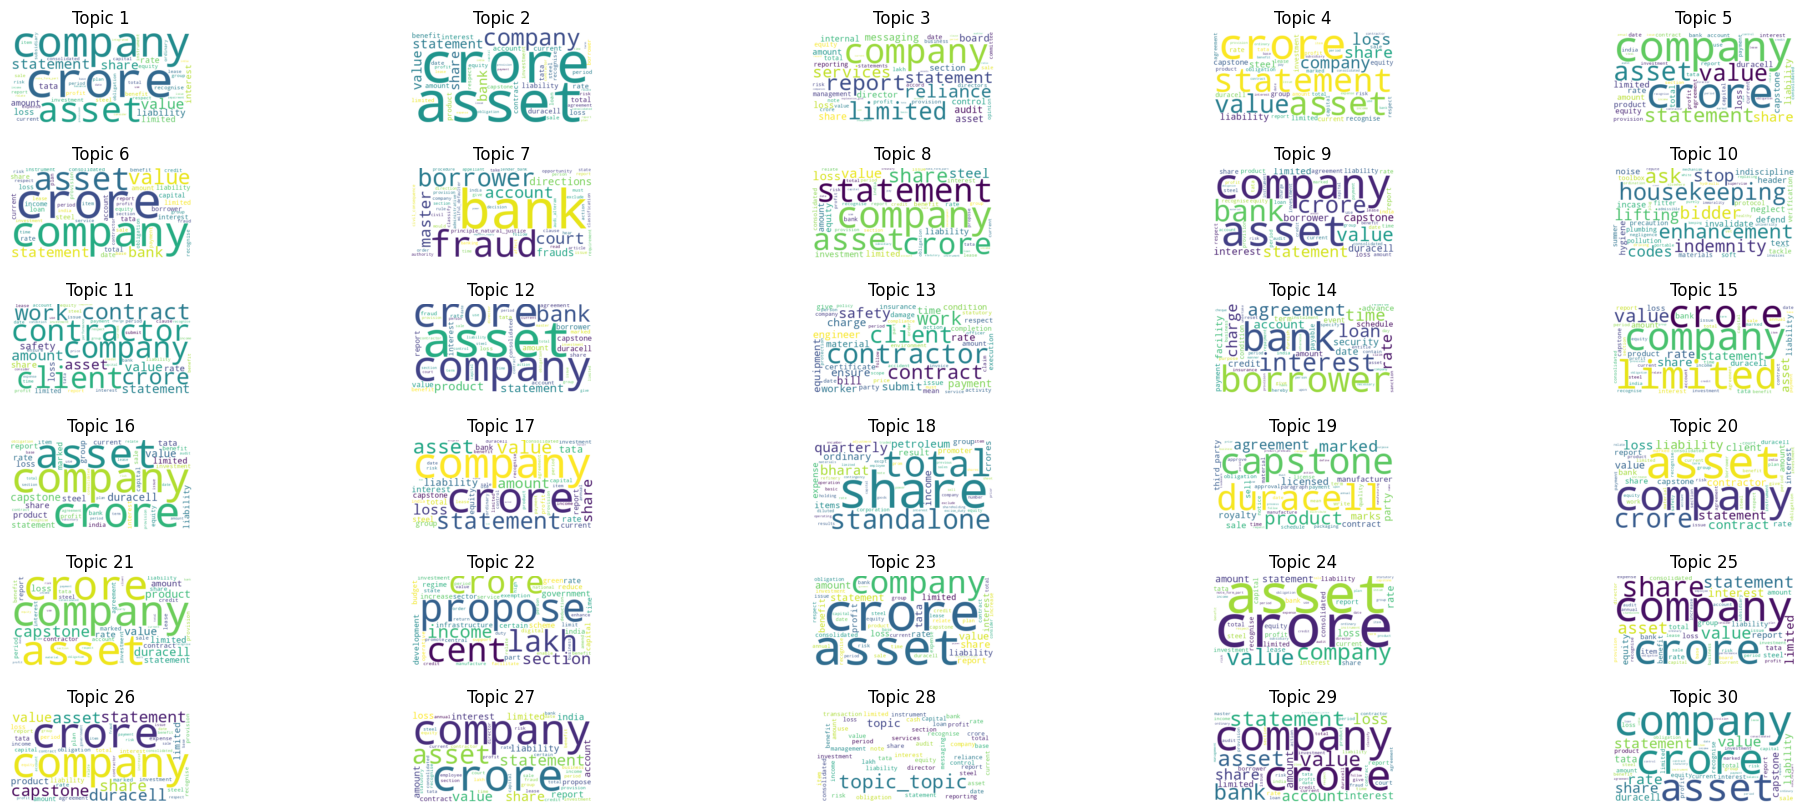

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have already defined and trained your LDA model as lda_model

num_topics = 30  # Change this to the actual number of topics in your model

# Set up subplots
num_rows = 6  # Increase the number of rows
num_cols = 5
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 10), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.5)

for topic in range(num_topics):
    # Get topics and frequencies and store in a dictionary structure
    topic_words_freq = dict(lda_model.show_topic(topic, topn=50))

    # Generate Word Cloud for topic using frequencies
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(topic_words_freq)

    # Plot each word cloud in a subplot
    ax = axes[topic // num_cols, topic % num_cols]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Topic {topic + 1}')
    ax.axis("off")

plt.show()

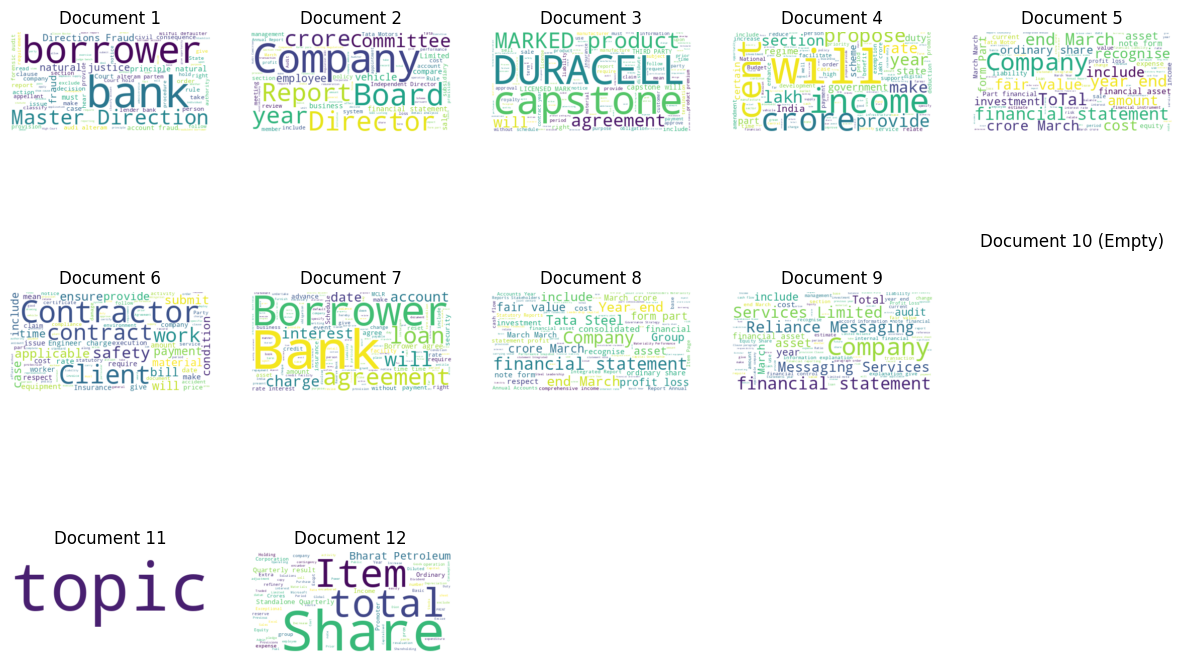

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Set up subplots
num_files = len(doc_corpus)
rows = num_files // 5 + 1
fig, axes = plt.subplots(nrows=rows, ncols=5, figsize=(15, 3 * rows), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.5)

for i, document_words in enumerate(doc_corpus):
    # Join the list of words into a single string
    document_text = ' '.join(document_words)

    # Check if the document has words
    if document_text:
        # Generate Word Cloud for document using frequencies
        wordcloud = WordCloud(background_color="white").generate(document_text)

        # Plot each word cloud in a subplot
        ax = axes[i // 5, i % 5]
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(f'Document {i + 1}')
        ax.axis("off")
    else:
        # Handle empty documents (optional)
        ax = axes[i // 5, i % 5]
        ax.set_title(f'Document {i + 1} (Empty)')
        ax.axis("off")

# Remove empty subplots if there are fewer documents than the total number of subplots
for i in range(num_files, rows * 5):
    fig.delaxes(axes.flatten()[i])

plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


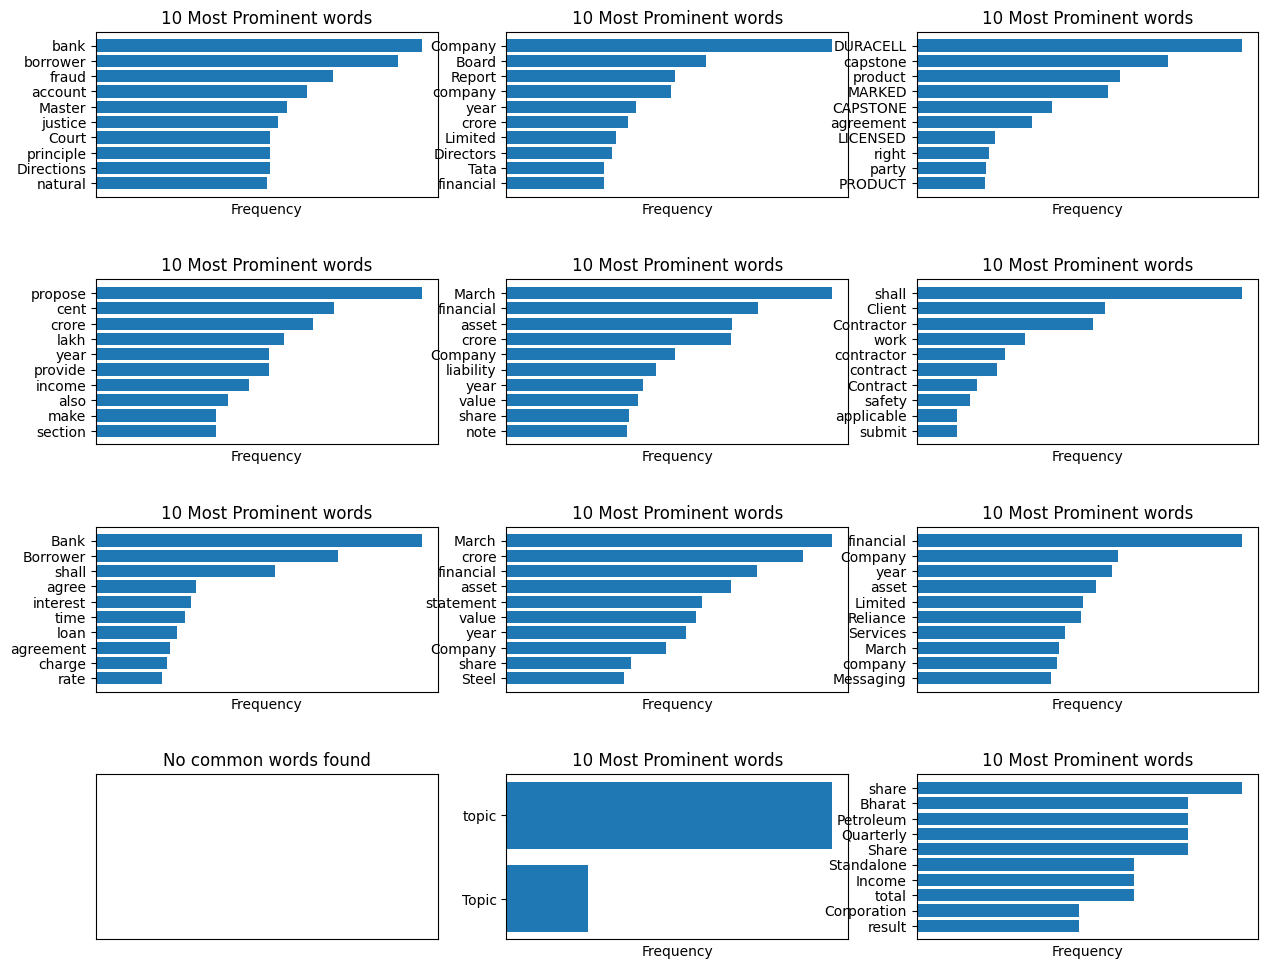

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords

# Assuming you have already defined and processed your doc_corpus

# Download the stop words dataset
nltk.download('stopwords')

# Load stop words
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a list of words
def remove_stopwords(words):
    return [word for word in words if word.lower() not in stop_words]

# Set up subplots
num_files = len(doc_corpus)
rows = num_files // 3 + 1  # Adjusted to display 3 charts in one line
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 3 * rows), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.5)

# Function to create and display bar chart for most occurring words
def plot_most_occurring_words(document_words, ax):
    # Remove stopwords
    document_words = remove_stopwords(document_words)

    # Get the most common words in the document
    common_words = Counter(document_words).most_common(10)

    # Check if common_words has values before unpacking
    if common_words:
        # Extract words and frequencies for plotting
        words, frequencies = zip(*common_words)

        # Plot horizontal bar chart
        ax.barh(words[::-1], frequencies[::-1])  # Reverse the order
        ax.set_title("10 Most Prominent words")
        ax.set_yticks(range(len(words)))  # Set the ticks
        ax.set_yticklabels(words[::-1], rotation=0, ha='right')  # Reverse the order
        ax.set_xlabel("Frequency")
    else:
        ax.set_title("No common words found")

# Loop through each document and plot the bar chart
for i, document_words in enumerate(doc_corpus):
    # Plot each bar chart in a subplot
    ax = axes[i // 3, i % 3]
    plot_most_occurring_words(document_words, ax)

# Remove empty subplots if there are fewer documents than the total number of subplots
for i in range(num_files, rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.show()

In [ ]:
from collections import Counter
from nltk.corpus import stopwords

# Assuming you have already defined and processed your doc_corpus

# Download the stop words dataset
nltk.download('stopwords')

# Load stop words
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a list of words
def remove_stopwords(words):
    return [word for word in words if word.lower() not in stop_words]

# Function to get the most common words in a document
def get_most_occurring_words(document_words):
    # Remove stopwords
    document_words = remove_stopwords(document_words)

    # Get the most common words in the document
    common_words = Counter(document_words).most_common(10)

    # Extract words for storage
    words = [word[0] for word in common_words]

    return words

# Loop through each document and save the most occurring words as variables
for i, document_words in enumerate(doc_corpus):
    list_name = f"List_Doc{i + 1}"
    most_occurring_words = get_most_occurring_words(document_words)
    locals()[list_name] = most_occurring_words

# Print or use the lists as needed
for i in range(len(doc_corpus)):
    list_name = f"List_Doc{i + 1}"
    print(f"{list_name}: {locals()[list_name]}")

List_Doc1: ['bank', 'borrower', 'fraud', 'account', 'Master', 'justice', 'Court', 'principle', 'Directions', 'natural']
List_Doc2: ['Company', 'Board', 'Report', 'company', 'year', 'crore', 'Limited', 'Directors', 'Tata', 'financial']
List_Doc3: ['DURACELL', 'capstone', 'product', 'MARKED', 'CAPSTONE', 'agreement', 'LICENSED', 'right', 'party', 'PRODUCT']
List_Doc4: ['propose', 'cent', 'crore', 'lakh', 'year', 'provide', 'income', 'also', 'make', 'section']
List_Doc5: ['March', 'financial', 'asset', 'crore', 'Company', 'liability', 'year', 'value', 'share', 'note']
List_Doc6: ['shall', 'Client', 'Contractor', 'work', 'contractor', 'contract', 'Contract', 'safety', 'applicable', 'submit']
List_Doc7: ['Bank', 'Borrower', 'shall', 'agree', 'interest', 'time', 'loan', 'agreement', 'charge', 'rate']
List_Doc8: ['March', 'crore', 'financial', 'asset', 'statement', 'value', 'year', 'Company', 'share', 'Steel']
List_Doc9: ['financial', 'Company', 'year', 'asset', 'Limited', 'Reliance', 'Servic

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(List_Doc45)

['Borrower', 'Lender', 'shall', 'borrower', 'Agreement', 'lender', 'Security', 'Facility', 'time', 'interest']


In [ ]:
BalanceSheet_Final= ['total', 'India','share', 'Bank', 'Income', 'Consolidated', 'result', 'Extra', 'Standalone', 'Bharat', 'Share', 'Items', 'Quarterly', 'Corporation', 'expense', 'Ordinary', 'Capital']
ContractAgreement_Final= ['rule', 'County', 'person', 'Designated', 'agent', 'Foreground', 'work', 'Section', 'Article', 'integrator', 'time', 'period', 'Buyer', 'case', 'Ministry', 'principal', 'objective', 'Project', 'CMAR', 'System', 'Consortium', 'payment', 'system', 'shall', 'include', 'Documentation', 'Seller', 'Nodal', 'offer', 'financing', 'provide', 'accordance', 'intent', 'service', 'Financing', 'Recipient', 'agreement', 'promise', 'Party', 'contract', 'court', 'Contract', 'product', 'rupee', 'Association', 'Research', 'price', 'Program', 'Authority', 'refer', 'party', 'obligation', 'make', 'mean', 'Service', 'would', 'good', 'Integrator', 'State', 'cost', 'Agency', 'agency', 'Agreement']
CourtCaseFiles_Final= ['report', 'statute', 'criminal', 'United', 'period', 'option', 'system', 'FATF', 'borrower', 'Congress', 'country', 'section', 'appellant', 'value', 'employee', 'pension', 'order', 'cheque', 'corporate', 'suicide', 'States', 'loan', 'crime', 'student', 'provision', 'effort', 'bail', 'fund', 'petitioner', 'fraud', 'application', 'enforcement', 'laundering', 'scheme', 'make', 'State',  'Parties', 'agency', 'issue', 'rule', 'victim', 'Assembly', 'paragraph', 'petition', 'money', 'proceeding', 'financial', 'case', 'salary', 'Court', 'shall', 'account', 'amount', 'substitute', 'refer', 'would', 'High', 'writ', 'date', 'notice', 'debtor', 'Section', 'decision', 'abuse', 'member', 'Registrar', 'word', 'include', 'Secretary', 'accuse', 'Recovery', 'rupee', 'power', 'mortgage', 'suit', 'hold', 'Petition']
FinancialReport_Final= ['customer', 'company', 'cash', 'segment', 'report', 'Republic', 'investment', 'drink', 'Group', 'share', 'Organization', 'year', 'asset', 'ANNUAL', 'financial', 'business', 'end', 'December', 'member', 'Financial', 'billion', 'August', 'client', 'include', 'increase', 'Segment', 'Management', 'service', 'Trust',  'Company', 'swiss',  'sale', 'product', 'Interim', 'fiscal', 'April', 'million', 'plan', 'impact', 'rate', 'annual', 'statement', 'value', 'quarter',  'franc', 'cost', 'risk', 'unit', 'liability']
LoanAgreement_Final= ['California', 'Account', 'Loan', 'loan', 'charge', 'Borrower', 'time', 'Note', 'Bank', 'term', 'NBCFDC', 'principal', 'Security', 'beneficiary', 'security', 'Facility', 'payment', 'Internal', 'Asset', 'shall', 'Property', 'prepayment', 'IREDA', 'amount', 'Owner', 'borrower', 'Lender', 'agreement', 'Corporation', 'advance', 'lender', 'Authority', 'party', 'interest', 'undertake', 'rate', 'scheme', 'agree', 'section', 'project', 'Schedule', 'channelize', 'agency', 'Agreement', 'date']

In [ ]:
# Assuming you have already defined Words_Topic1 to Words_Topic30, and the specified final lists

# Lists containing final words
final_lists = [
    (BalanceSheet_Final, "BalanceSheet_Final"),
    (ContractAgreement_Final, "ContractAgreement_Final"),
    (CourtCaseFiles_Final, "CourtCaseFiles_Final"),
    (FinancialReport_Final, "FinancialReport_Final"),
    (LoanAgreement_Final, "LoanAgreement_Final")
]

# Function to calculate Jaccard similarity
def calculate_jaccard_similarity(list1, list2):
    intersection = len(set(list1) & set(list2))
    union = len(set(list1) | set(list2))
    return intersection / union if union != 0 else 0

# Iterate through Words_Topic lists and calculate similarity with each final list
for i, topic_words in enumerate(topic_words_lists):
    list_name = f"Words_Topic{i + 1}"

    # Display the topic name
    print(f"\nTopic {i + 1} ({list_name}):")

    # Calculate and display similarity with each final list
    for final_list, final_list_name in final_lists:
        similarity = calculate_jaccard_similarity(topic_words, final_list)
        print(f"Similarity with {final_list_name}: {similarity:.2%}")



Topic 1 (Words_Topic1):
Similarity with BalanceSheet_Final: 4.69%
Similarity with ContractAgreement_Final: 1.80%
Similarity with CourtCaseFiles_Final: 5.83%
Similarity with FinancialReport_Final: 13.79%
Similarity with LoanAgreement_Final: 4.40%

Topic 2 (Words_Topic2):
Similarity with BalanceSheet_Final: 4.69%
Similarity with ContractAgreement_Final: 6.60%
Similarity with CourtCaseFiles_Final: 8.55%
Similarity with FinancialReport_Final: 15.12%
Similarity with LoanAgreement_Final: 11.76%

Topic 3 (Words_Topic3):
Similarity with BalanceSheet_Final: 3.08%
Similarity with ContractAgreement_Final: 0.89%
Similarity with CourtCaseFiles_Final: 6.72%
Similarity with FinancialReport_Final: 10.00%
Similarity with LoanAgreement_Final: 3.26%

Topic 4 (Words_Topic4):
Similarity with BalanceSheet_Final: 4.69%
Similarity with ContractAgreement_Final: 4.63%
Similarity with CourtCaseFiles_Final: 5.83%
Similarity with FinancialReport_Final: 13.79%
Similarity with LoanAgreement_Final: 5.56%

Topic 5 (W

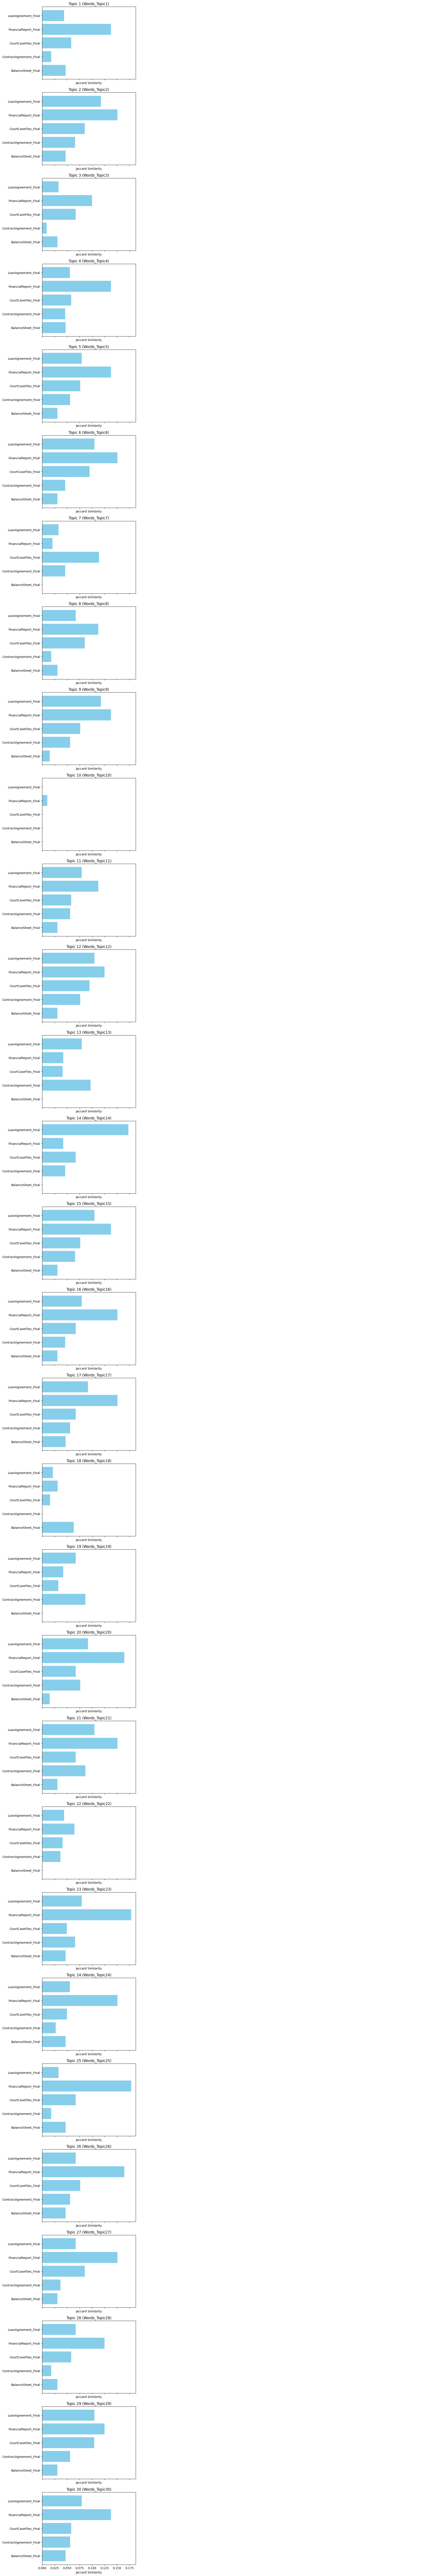

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined Words_Topic1 to Words_Topic30, and the specified final lists

# Lists containing final words
final_lists = [
    (BalanceSheet_Final, "BalanceSheet_Final"),
    (ContractAgreement_Final, "ContractAgreement_Final"),
    (CourtCaseFiles_Final, "CourtCaseFiles_Final"),
    (FinancialReport_Final, "FinancialReport_Final"),
    (LoanAgreement_Final, "LoanAgreement_Final")
]

# Function to calculate Jaccard similarity
def calculate_jaccard_similarity(list1, list2):
    intersection = len(set(list1) & set(list2))
    union = len(set(list1) | set(list2))
    return intersection / union if union != 0 else 0

# Set up subplots for four charts in one line
num_topics = len(topic_words_lists)
num_cols = 4
fig, axes = plt.subplots(nrows=num_topics, ncols=num_cols, figsize=(20, 4 * num_topics), sharex=True, sharey=True)

# Iterate through Words_Topic lists and create similarity charts
for i, (topic_words, ax_row) in enumerate(zip(topic_words_lists, axes)):
    list_name = f"Words_Topic{i + 1}"

    # Calculate similarity with each final list
    similarities = [calculate_jaccard_similarity(topic_words, final_list) for final_list, _ in final_lists]

    # Create horizontal bar charts for visualization
    ax_row[0].barh([name for _, name in final_lists], similarities, color='skyblue')
    ax_row[0].set_title(f"Topic {i + 1} ({list_name})")
    ax_row[0].set_xlabel("Jaccard Similarity")

    # Remove the other subplots
    for j in range(1, num_cols):
        ax_row[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Lists containing final words
final_lists = [
    (BalanceSheet_Final, "BalanceSheet_Final"),
    (ContractAgreement_Final, "ContractAgreement_Final"),
    (CourtCaseFiles_Final, "CourtCaseFiles_Final"),
    (FinancialReport_Final, "FinancialReport_Final"),
    (LoanAgreement_Final, "LoanAgreement_Final")
]

# Function to calculate Jaccard similarity
def calculate_jaccard_similarity(list1, list2):
    intersection = len(set(list1) & set(list2))
    union = len(set(list1) | set(list2))
    return intersection / union if union != 0 else 0

# Iterate through List_Doc lists and calculate similarity with each final list
for i in range(len(doc_corpus)):
    list_name = f"List_Doc{i + 1}"
    list_words = locals()[list_name]

    # Display the list name
    print(f"\n{list_name}:")

    # Calculate and display similarity with each final list
    for final_list, final_list_name in final_lists:
        similarity = calculate_jaccard_similarity(list_words, final_list)
        print(f"Similarity with {final_list_name}: {similarity:.2%}")



List_Doc1:
Similarity with BalanceSheet_Final: 0.00%
Similarity with ContractAgreement_Final: 0.00%
Similarity with CourtCaseFiles_Final: 4.82%
Similarity with FinancialReport_Final: 0.00%
Similarity with LoanAgreement_Final: 1.85%

List_Doc2:
Similarity with BalanceSheet_Final: 0.00%
Similarity with ContractAgreement_Final: 0.00%
Similarity with CourtCaseFiles_Final: 1.16%
Similarity with FinancialReport_Final: 7.27%
Similarity with LoanAgreement_Final: 0.00%

List_Doc3:
Similarity with BalanceSheet_Final: 0.00%
Similarity with ContractAgreement_Final: 4.29%
Similarity with CourtCaseFiles_Final: 0.00%
Similarity with FinancialReport_Final: 1.72%
Similarity with LoanAgreement_Final: 3.77%

List_Doc4:
Similarity with BalanceSheet_Final: 0.00%
Similarity with ContractAgreement_Final: 2.82%
Similarity with CourtCaseFiles_Final: 2.35%
Similarity with FinancialReport_Final: 1.72%
Similarity with LoanAgreement_Final: 1.85%

List_Doc5:
Similarity with BalanceSheet_Final: 3.85%
Similarity wit

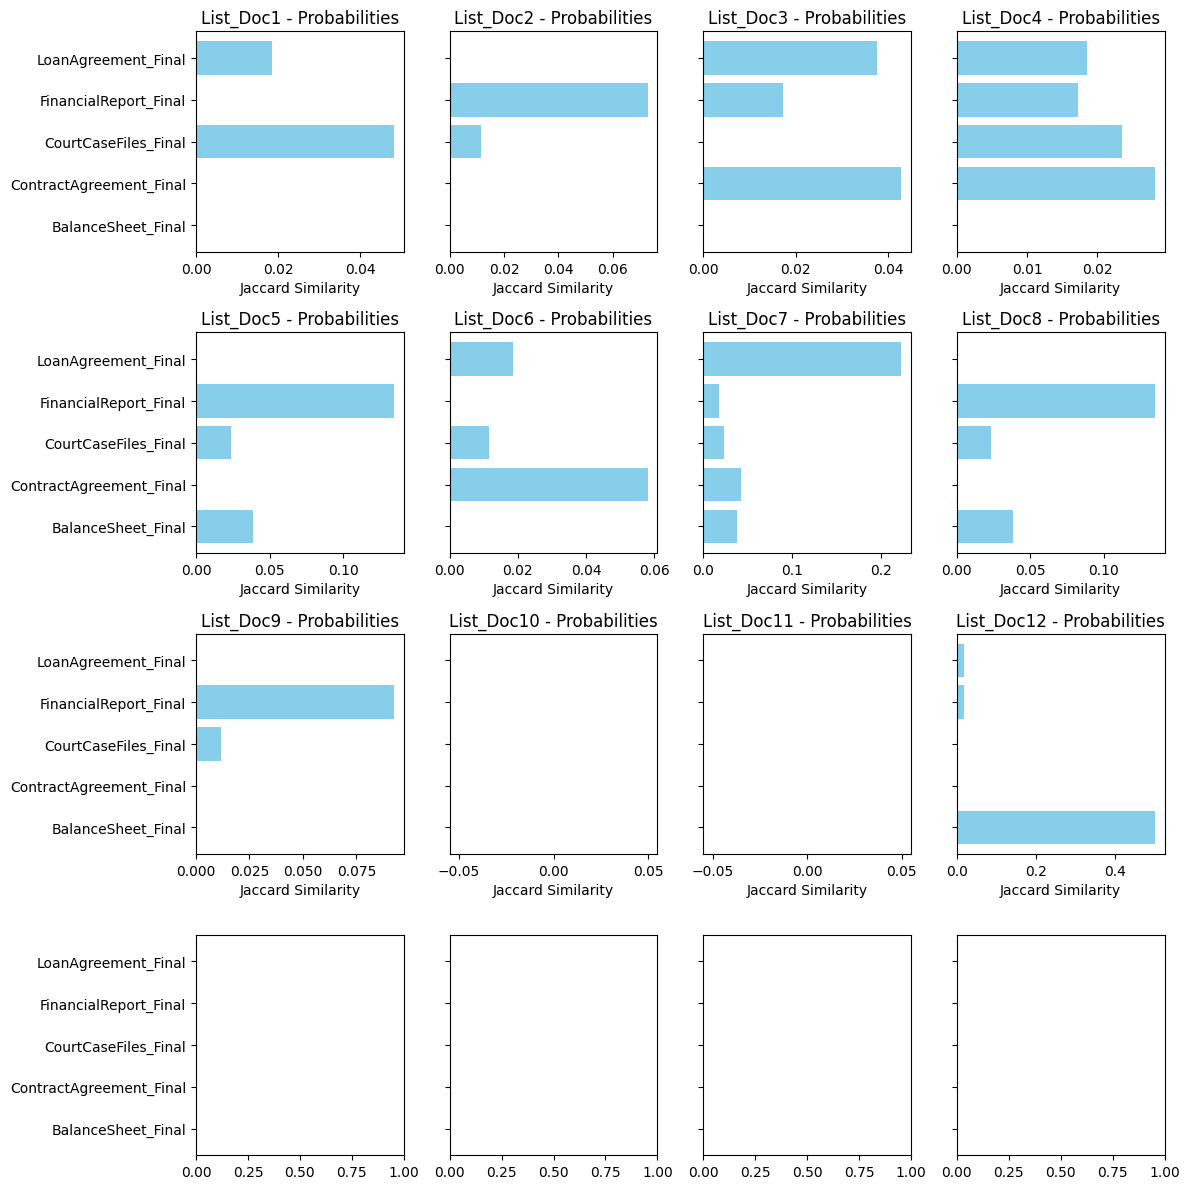

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set up subplots
num_rows = len(doc_corpus) // 4 + 1
num_cols = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 3 * num_rows), sharey=True)

# Iterate through List_Doc lists and calculate similarity with each final list
for i in range(len(doc_corpus)):
    list_name = f"List_Doc{i + 1}"
    list_words = locals()[list_name]

    # Calculate similarity with each final list
    similarities = [calculate_jaccard_similarity(list_words, final_list) for final_list, _ in final_lists]

    # Create horizontal bar chart for visualization
    ax = axes[i // num_cols, i % num_cols]
    ax.barh([name for _, name in final_lists], similarities, color='skyblue')
    ax.set_title(f"{list_name} - Probabilities")
    ax.set_xlabel("Jaccard Similarity")

# Adjust layout
plt.tight_layout()
plt.show()
